# Polynomial Regression Assignment (Please do not remove the output cells)

## The objective is to apply polynomial regression on the provided data using 3 regularization techniques

Tasks are defined below:
1-  Read the dataset, and get acquainted with its features and labels. Check the link below for more details about the data.  
https://archive.ics.uci.edu/ml/datasets/Air+Quality  

2-  This dataset has 5 different output labels. For this assignment we only need the NO2 output. Please drop other outputs.  

3-  Handle missing data similar to what was covered in tutorial 3.  

4-  Replace the date feature with 3 separate features (Day, Month and Year).  

5-  Replace the time feature with 3 separate features (Hours, Minutes and Seconds).  

6-  Apply feature scaling.  

7-  Evaluate different degrees of lasso CV polynomial regression.  

8-  Choose the best degree and print the errors on the test data, model coefficients and the lasso parameters.  

9-  Repeat steps 4 and 5 using Ridge CV polynomial regression.  

10- Repeat steps 4 and 5 using ElasticNet CV polynomial regression.  

11- Compare the errors from the 3 regularization techniques, and save the best model.  

12- Load the best model and test it on a sample that you manually created it.  


## Enter your IDs and Names below

1-   
  
2-


### Imports

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

### 1- Read the data

In [ ]:
AirQualityUCI = pd.read_csv('AirQualityUCI.csv')
AirQualityUCI.head()
#

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


### 2- Drop unwanted labels

In [ ]:
# i think we should remove PT08.S1 &2 $3 AND 5
AirQualityUCI.drop(['CO(GT)','NMHC(GT)','C6H6(GT)','NOx(GT)'],axis=1,inplace=True)
AirQualityUCI

,Date,Time,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,1360.0,1046.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,1292.0,955.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,1402.0,939.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,1376.0,948.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1272.0,836.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,1314.0,1101.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,1163.0,1027.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,1142.0,1063.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,1003.0,961.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [ ]:
def percent_missing(df):
    percent_nan = 100* AirQualityUCI.isnull().sum() / len(AirQualityUCI)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

PT08.S1(CO)       3.91151
PT08.S2(NMHC)     3.91151
PT08.S3(NOx)      3.91151
PT08.S4(NO2)      3.91151
PT08.S5(O3)       3.91151
T                 3.91151
RH                3.91151
AH                3.91151
NO2(GT)          17.54836
dtype: float64


(0.0, 20.0)

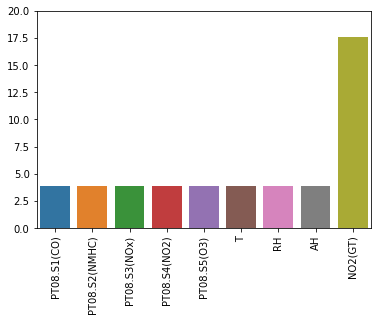

In [ ]:
percent_nan = percent_missing(AirQualityUCI)
print(percent_nan)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,20)

In [ ]:
AirQualityUCI = AirQualityUCI.dropna(axis=0,subset= ['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH'])

NO2(GT)    17.773329
dtype: float64


(0.0, 20.0)

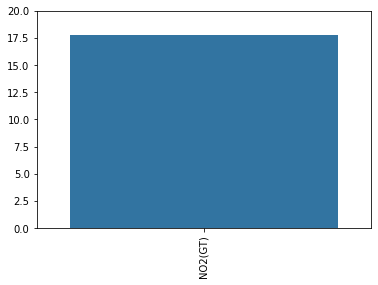

In [ ]:
percent_nan = percent_missing(AirQualityUCI)
print(percent_nan)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,20)


### 3- Replace date feature

In [ ]:
AirQualityUCI["Date"]=pd.to_datetime(AirQualityUCI["Date"])
AirQualityUCI['Day'] = AirQualityUCI['Date'].dt.day
AirQualityUCI['Month'] = AirQualityUCI['Date'].dt.month
AirQualityUCI['Year'] = AirQualityUCI['Date'].dt.year
AirQualityUCI.head()
AirQualityUCI.drop("Date",axis=1, inplace=True)
AirQualityUCI

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Time,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Day,Month,Year
0,18:00:00,1360.0,1046.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,10,3,2004
1,19:00:00,1292.0,955.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,10,3,2004
2,20:00:00,1402.0,939.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,10,3,2004
3,21:00:00,1376.0,948.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,10,3,2004
4,22:00:00,1272.0,836.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,10,3,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,10:00:00,1314.0,1101.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,4,4,2005
9353,11:00:00,1163.0,1027.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,4,4,2005
9354,12:00:00,1142.0,1063.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,4,4,2005
9355,13:00:00,1003.0,961.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,4,4,2005


### 4- Replace time feature

In [ ]:
AirQualityUCI["Time"]=pd.to_datetime(AirQualityUCI["Time"])
AirQualityUCI["Hours"]=AirQualityUCI["Time"].dt.hour
AirQualityUCI["Minutes"]=AirQualityUCI["Time"].dt.minute
AirQualityUCI["Seconds"]=AirQualityUCI["Time"].dt.second
AirQualityUCI.drop(['Time'], axis=1,inplace=True)
AirQualityUCI.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Day,Month,Year,Hours,Minutes,Seconds
0,1360.0,1046.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,10,3,2004,18,0,0
1,1292.0,955.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,10,3,2004,19,0,0
2,1402.0,939.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,10,3,2004,20,0,0
3,1376.0,948.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,10,3,2004,21,0,0
4,1272.0,836.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,10,3,2004,22,0,0


### 5- Handle missing data

In [ ]:
AirQualityUCI[AirQualityUCI['NO2(GT)'].isnull()]

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Day,Month,Year,Hours,Minutes,Seconds
9,1010.0,561.0,1705.0,NaN,1235.0,501.0,10.3,60.2,0.7517,11,3,2004,3,0,0
33,889.0,574.0,1680.0,NaN,1187.0,512.0,7.0,62.3,0.6261,12,3,2004,3,0,0
39,1545.0,1353.0,767.0,NaN,2058.0,1588.0,9.2,56.2,0.6561,12,3,2004,9,0,0
57,1172.0,783.0,1179.0,NaN,1380.0,996.0,7.8,67.5,0.7173,13,3,2004,3,0,0
81,1344.0,968.0,921.0,NaN,1620.0,1278.0,11.6,63.4,0.8674,14,3,2004,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8673,841.0,470.0,1311.0,NaN,708.0,289.0,5.3,51.0,0.4563,7,3,2005,3,0,0
8697,876.0,576.0,1040.0,NaN,815.0,900.0,1.0,56.7,0.3803,8,3,2005,3,0,0
8721,937.0,600.0,985.0,NaN,873.0,885.0,4.7,53.1,0.4589,9,3,2005,3,0,0
8745,1014.0,731.0,784.0,NaN,1062.0,1038.0,4.6,78.2,0.6684,10,3,2005,3,0,0


In [ ]:
AirQualityUCI.shape

(8991, 15)

In [ ]:
# iterative imputation transform for the horse colic dataset
from numpy import isnan
from pandas import read_csv
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# load dataset
#url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
#dataframe = read_csv(url, header=None, na_values='?')
# split into input and output elements
#data = dataframe.values
#ix = [i for i in range(data.shape[1]) if i != 23]
#X, y = data[:, ix], data[:, 23]
# print total missing
#print('Missing: %d' % sum(isnan(X).flatten()))

# define imputer
imputer = IterativeImputer()
# fit on the dataset
# transform the dataset

Xtrans = imputer.fit_transform(AirQualityUCI)
Xtrans.shape
AirQualityUCI=pd.DataFrame(data =Xtrans,columns=AirQualityUCI.columns)
AirQualityUCI
# print total missing


,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Day,Month,Year,Hours,Minutes,Seconds
0,1360.0,1046.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,10.0,3.0,2004.0,18.0,0.0,0.0
1,1292.0,955.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,10.0,3.0,2004.0,19.0,0.0,0.0
2,1402.0,939.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,10.0,3.0,2004.0,20.0,0.0,0.0
3,1376.0,948.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,10.0,3.0,2004.0,21.0,0.0,0.0
4,1272.0,836.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,10.0,3.0,2004.0,22.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8986,1314.0,1101.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,4.0,4.0,2005.0,10.0,0.0,0.0
8987,1163.0,1027.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,4.0,4.0,2005.0,11.0,0.0,0.0
8988,1142.0,1063.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,4.0,4.0,2005.0,12.0,0.0,0.0
8989,1003.0,961.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,4.0,4.0,2005.0,13.0,0.0,0.0


In [ ]:
AirQualityUCI[AirQualityUCI['NO2(GT)'].isnull()]

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Day,Month,Year,Hours,Minutes,Seconds


### 6- Apply feature scaling

6-b Polynomial Conversion

In [ ]:
X = AirQualityUCI.drop("NO2(GT)", axis=1)
y = AirQualityUCI["NO2(GT)"]
X,y

(      PT08.S1(CO)  PT08.S2(NMHC)  PT08.S3(NOx)  PT08.S4(NO2)  PT08.S5(O3)  \
 0          1360.0         1046.0        1056.0        1692.0       1268.0   
 1          1292.0          955.0        1174.0        1559.0        972.0   
 2          1402.0          939.0        1140.0        1555.0       1074.0   
 3          1376.0          948.0        1092.0        1584.0       1203.0   
 4          1272.0          836.0        1205.0        1490.0       1110.0   
 ...           ...            ...           ...           ...          ...   
 8986       1314.0         1101.0         539.0        1374.0       1729.0   
 8987       1163.0         1027.0         604.0        1264.0       1269.0   
 8988       1142.0         1063.0         603.0        1241.0       1092.0   
 8989       1003.0          961.0         702.0        1041.0        770.0   
 8990       1071.0         1047.0         654.0        1129.0        816.0   
 
          T    RH      AH   Day  Month    Year  Hours  Minutes

### 9a- Evaluate different degrees of Ridge CV polynomial regression

1
2
3
4
5


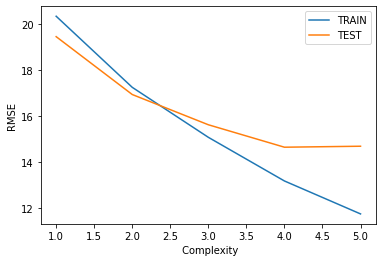

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error,mean_squared_error


train_rmse_errors = []
test_rmse_errors = []
for i in range(1,6):
    print(i)
    polynomial_converter = PolynomialFeatures(degree=i,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    #lasso_cv_model = LassoCV(eps=0.01,n_alphas=1000,cv=5,max_iter=10000)
    ridge_cv_model = RidgeCV(alphas=[0.1,1.8,1.89,1.9,2.0,3.0],scoring='neg_mean_absolute_error')
    ridge_cv_model.fit(X_train,y_train)
    ridge_cv_model.alpha_
    test_predictions = ridge_cv_model.predict(X_test)
    train_predictions = ridge_cv_model.predict(X_train)

    test_MSE = mean_squared_error(y_test,test_predictions)
    test_RMSE = np.sqrt(test_MSE)
    train_MSE = mean_squared_error(y_train,train_predictions)
    train_RMSE = np.sqrt(train_MSE)
    #print(MAE)
    #print(MSE)
    #print(RMSE)
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)



plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel(" Complexity")
plt.ylabel("RMSE")
plt.legend()

### 9b- Choose the best degree and print the errors, model coefficients and the Ridge parameters.

In [ ]:
final_poly_converter = PolynomialFeatures(degree=2,include_bias=False)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
ridge_cv_model = RidgeCV(alphas=[0.1,1.8,1.89,1.9,2.0,3.0],scoring='neg_mean_absolute_error')
ridge_cv_model.fit(X_train,y_train)
ridge_cv_model.alpha_
test_predictions = ridge_cv_model.predict(X_test)

Ridge_test_MAE = mean_absolute_error(y_test,test_predictions)
Ridge_test_MSE = mean_squared_error(y_test,test_predictions)
Ridge_test_RMSE = np.sqrt(test_MSE)
print(Ridge_test_MAE)
print(Ridge_test_MSE)
print(Ridge_test_RMSE)
print(ridge_cv_model.coef_)
print(ridge_cv_model.alpha_)


In [ ]:
test_predictions = ridge_cv_model.predict(X_test)
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)
print(MAE)
print(MSE)
print(RMSE)
print(ridge_cv_model.coef_)
print(ridge_cv_model.alpha_)

10.042825659239268
215.40821060778973
14.67679156381904
[ 9.72745053 19.67432233 -2.72134126 ...  0.          0.
  0.        ]
0.1


### 7- Evaluate different degrees of lasso CV polynomial regression

1
2
3
4
5


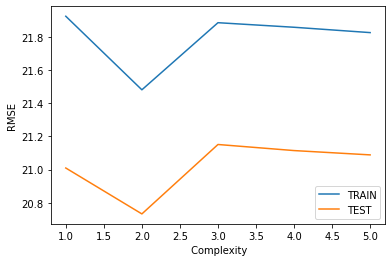

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error,mean_squared_error



train_rmse_errors = []
test_rmse_errors = []
for i in range(1,6):
    print(i)
    polynomial_converter = PolynomialFeatures(degree=i,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    #lasso_cv_model = LassoCV(eps=0.01,n_alphas=1000,cv=5,max_iter=10000)
    lasso_cv_model = LassoCV(eps=0.1,n_alphas=60,cv=10,max_iter=10000)
    lasso_cv_model.fit(X_train,y_train)
    lasso_cv_model.alpha_
    test_predictions = lasso_cv_model.predict(X_test)
    train_predictions = lasso_cv_model.predict(X_train)

    test_MSE = mean_squared_error(y_test,test_predictions)
    test_RMSE = np.sqrt(test_MSE)
    train_MSE = mean_squared_error(y_train,train_predictions)
    train_RMSE = np.sqrt(train_MSE)
    #print(MAE)
    #print(MSE)
    #print(RMSE)
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)



plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel(" Complexity")
plt.ylabel("RMSE")
plt.legend()


### 8- Choose the best degree and print the errors, model coefficients and the lasso parameters.

In [ ]:
final_poly_converter = PolynomialFeatures(degree=2,include_bias=False)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
lasso_cv_model = LassoCV(eps=0.1,n_alphas=60,cv=5,max_iter=1000)
lasso_cv_model.fit(X_train,y_train)
test_predictions = lasso_cv_model.predict(X_test)

Lasso_test_MAE = mean_absolute_error(y_test,test_predictions)
Lasso_test_MSE = mean_squared_error(y_test,test_predictions)
Lasso_test_RMSE = np.sqrt(test_MSE)
print(Lasso_test_MAE)
print(Lasso_test_MSE)
print(Lasso_test_RMSE)
print(lasso_cv_model.coef_)
print(lasso_cv_model.alpha_)


1017.4157822797481
2327699.8272393695
1525.680119566146
[ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.26279783e+01  0.00000000e+00 -5.67052856e-02 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.02316002e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.02333477e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  7.81569859e+01 -1.90101760e+02  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.38482649e+02 -1.97374958e+02  6.16355204e+01
 -0.00000000e+00  2.64726270e+02  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -7.58274899e+01  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  1.90585190e+02 -0.00000000e+00
 -0.00000000e+00 -2.95007387e-01  

### 10a- Evaluate different degrees of ElasticNet CV polynomial regression

In [ ]:
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

train_rmse_errors = []
test_rmse_errors = []
for i in range(1,6):
    print(i)
    polynomial_converter = PolynomialFeatures(degree=i,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99,.99, 1],eps=0.01,n_alphas=60,max_iter=1000)
    elastic_model.fit(X_train,y_train)
    test_predictions = elastic_model.predict(X_test)
    train_predictions = elastic_model.predict(X_train)

    test_MSE = mean_squared_error(y_test,test_predictions)
    test_RMSE = np.sqrt(test_MSE)
    train_MSE = mean_squared_error(y_train,train_predictions)
    train_RMSE = np.sqrt(train_MSE)
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)



plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel(" Complexity")
plt.ylabel("RMSE")
plt.legend()

### 10b- Choose the best degree and print the errors, model coefficients and ElasticNet parameters.

In [ ]:
final_poly_converter = PolynomialFeatures(degree=2,include_bias=False)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99,.99, 1],eps=0.01,n_alphas=60,max_iter=1000)
elastic_model.fit(X_train,y_train)
test_predictions = elastic_model.predict(X_test)

Elastic_test_MAE = mean_absolute_error(y_test,test_predictions)
Elastic_test_MSE = mean_squared_error(y_test,test_predictions)
Elastic_test_RMSE = np.sqrt(Elastic_test_MSE)
print(Elastic_test_MAE)
print(Elastic_test_MSE)
print(Elastic_test_RMSE)
print(elastic_model.coef_)
print(elastic_model.alpha_)


### 11- Compare the errors from the 3 regularization techniques, and save the best model.

### 12- Load the best model and test it on a sample that you manually created it.

## Great work!
----